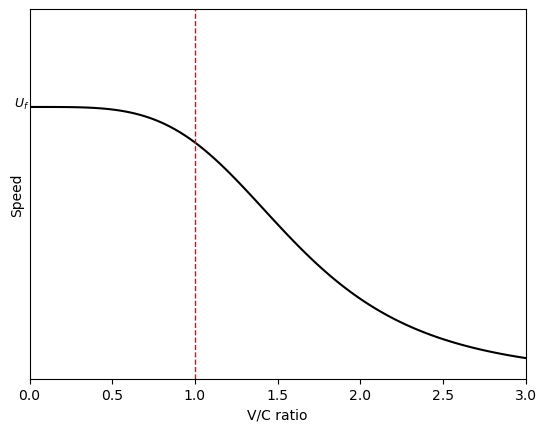

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define the BPR function for velocity
def bpr_velocity(V_over_C, V0, a, b):
    return V0 / (1 + a * (V_over_C**b))

# Define the range of V/C ratios from 0 to 2
V_over_C = np.linspace(0, 3, 100)  # Adjust the number of points as needed

# Define values for V0, a, and b
V0 = 40  # Replace with your values
a = 0.15  # Replace with your values
b = 4  # Replace with your values

# Calculate velocities using the BPR function
velocities = bpr_velocity(V_over_C, V0, a, b)

# Create the graph
# Set the color parameter to 'black'
plt.plot(V_over_C, velocities, color='black')
plt.xlabel('V/C ratio')
plt.ylabel('Speed')

# Hide the values on the y-axis
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Remove the blue line from the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles = [h[0] if isinstance(h, list) else h for h in handles]
labels = [l if 'a' in l or 'b' in l else '' for l in labels]
#plt.legend(handles, labels)

# Add a black bold dotted vertical line at V/C = 1
plt.axvline(x=1, color='red', linestyle='--', linewidth=1, label='V/C=1')

# Adjust the x-axis limits to start from 0
plt.xlim(0, 3)

# Add a 'uf' label with 'f' as a subscript at the intersection point with the y-axis
plt.text(0, velocities[0], r'$U_f$', ha='right', fontsize=9)

# Disable the grid
plt.grid(False)
plt.ylim(bottom=0, top=plt.ylim()[1] * 1.3)  # You can adjust the factor as needed

# Save the plot as an image after displaying it
plt.savefig('bpr_velocity_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()



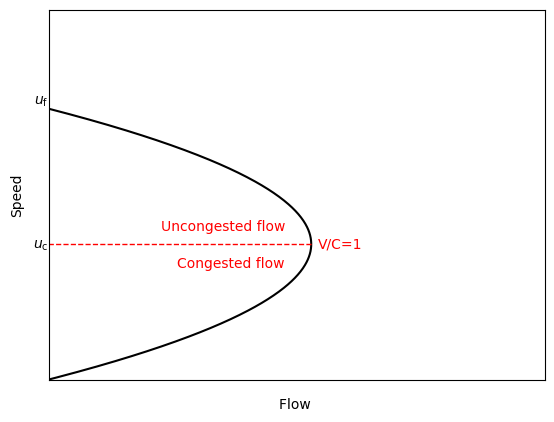

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define the speed function here
def speed_function(density, free_flow_speed, jam_density):
    # This function calculates speed based on density
    return free_flow_speed * (1 - density / jam_density)

# Define your free flow speed and jam density
free_flow_speed = 4  # This is just an example value, replace it with your actual value
jam_density = 200  # This is just an example value, replace it with your actual value

# Generate a range of densities
densities = np.linspace(0, jam_density, 500)

# Calculate the corresponding speeds
speeds = speed_function(densities, free_flow_speed, jam_density)

# Calculate the flow
flow = speeds * densities

# Find the index of the maximum value in the flow array
max_index = np.argmax(flow)
# Find the corresponding density and speed for the maximum value
q = flow[max_index]
density_max = densities[max_index]
speed_max = speeds[max_index]

# Create the plot with more white space
plt.figure(figsize=(6.4, 4.8))
plt.plot(flow, speeds, linewidth=1.5, color='black')  # Adjust the linewidth as needed
plt.xlabel('Flow ')
plt.ylabel('Speed')

# Move the y-axis label a little to the left
plt.gca().yaxis.set_label_coords(-0.05, 0.5)
plt.gca().xaxis.set_label_coords(0.5, -0.05)

plt.xlim(left=0)  # Start the plot from the y-axis
plt.ylim(bottom=0)  # Start the plot from the x-axis

# Remove tick labels on both axes
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Plot vertical and horizontal lines intersecting at the maximum value
# Find the intersection points
intersect_x = np.interp(speed_max, speeds, flow)
intersect_y = np.interp(q, flow, speeds)

plt.plot([q, intersect_x], [speed_max, speed_max], color='red', linestyle='--', linewidth=1, clip_on=False)
#plt.plot([q, q], [speed_max, intersect_y], color='red', linestyle='--', linewidth=1, clip_on=False)

# Add text above and below the red lines with vertical separation
text_offset_x = 20  # Adjust this value to control the horizontal offset
text_offset_y = 0.02  # Adjust this value to control the vertical separation
plt.text(q - text_offset_x, speed_max + 7*text_offset_y, f'Uncongested flow', ha='right', va='bottom', color='red')
plt.text(q - text_offset_x, intersect_y + 80*text_offset_y, f'Congested flow', ha='right', va='bottom', color='red')

# Label the first point of contact with the y-axis as 'uf' with small index 'f'
plt.text(0, speeds[0], r'$u_{\mathrm{f}}$', ha='right', va='bottom', color='black')

# Mark the maximum flow point on the x-axis
plt.text(q+39, 2.1, f'V/C=1', ha='right', va='top', color='red')

# Mark the maximum flow point on the y-axis
plt.text(0, speed_max+0.08, r'$u_{\mathrm{c}}$', ha='right', va='top', color='black')

# Adjust layout for more white space
# plt.tight_layout(pad=8.0)
# Set the axis limits to zoom out
plt.xlim(left=0, right=plt.xlim()[1] * 1.8)  # You can adjust the factor as needed
plt.ylim(bottom=0, top=plt.ylim()[1] * 1.3)  # You can adjust the factor as needed

# Save the plot as an image after displaying it
plt.savefig('fund_plot.png', dpi=300, bbox_inches='tight')
plt.show()


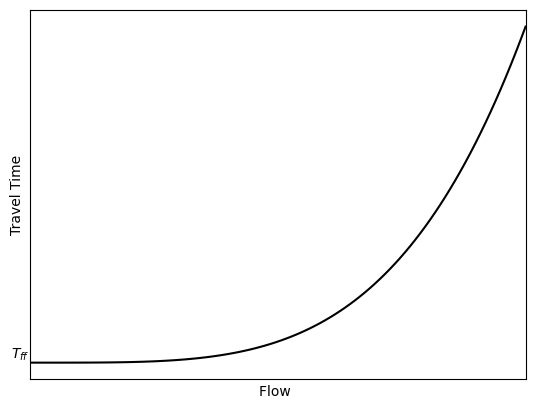

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the BPR function for travel time
def bpr_function(Q, a, b, T0, C):
    return T0 * (1 + a * (Q / C)**b)

# Define the range of flow values (Q)
Q_values = np.linspace(0, 100, 100)  # Adjust the range and number of points as needed

# Define values for parameters a, b, T0, and C
a = 0.15  # Replace with your values
b = 4    # Replace with your values
T0 = 4   # Replace with your values
C = 1050   # Replace with your values

# Calculate travel times using the BPR function
travel_times = bpr_function(Q_values, a, b, T0, C)

# Create the plot without a label
plt.plot(Q_values, travel_times, color='black')
plt.xlabel('Flow ')
plt.ylabel('Travel Time')

# Remove tick labels from both axes
plt.xticks([])  # Removes x-axis tick labels
plt.yticks([])  # Removes y-axis tick labels

# Set x-axis limits to start from the minimum value in Q_values
plt.xlim(Q_values.min(), Q_values.max())

# Find the index where Q is closest to zero
index_zero = np.abs(Q_values - 0).argmin()
# Mark the point where the plot intersects the y-axis with Tff
Tff = travel_times[index_zero]
plt.text(0, Tff, r'$T_{ff}$', ha='right', va='bottom', color='black')



# Save the plot as an image after displaying it
plt.savefig('bpr_travel_time_plot.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

